# Comparison of chlorophyll data from different sensors

Different ocean color sensors have been launched since 1997 to provide continuous global ocean color data. Unfortunately, because of differences in sensor design and calibration, chlorophyll-a concentration values don’t match during their periods of overlap, making it challenging to study long-term trends.

As an example, we are going to plot time-series of mean chlorophyll a concentration from various sensors from 1997 to 2019 to look at the periods of overlap. 
We are going to download data from Seawifs (1997-2010), MODIS (2002-2019) and VIIRS (2012-2019) and compare it to the ESA-CCI data (1997-2019) which combines all 3 sensors into a homogeneous time-series.

First, let's load all the packages needed:

In [1]:
import urllib.request 
import xarray as xr 
import netCDF4 as nc

import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
from matplotlib.colors import LinearSegmentedColormap 
np.warnings.filterwarnings('ignore')

The OceanWatch website has a data catalog containing documentation and links to all the datasets available:
https://oceanwatch.pifsc.noaa.gov/doc.html

Navigate to the "Ocean Color" tab. From there you can access the different datasets using ERDDAP or THREDDS.

## Get monthly seawifs data, which starts in 1997

Go to ERDDAP to find the name of the dataset for monthly SeaWIFS data: sw_chla_monthly_2018_0

You should always examine the dataset in ERDDAP to check the date range, names of the variables and dataset ID, to make sure your griddap calls are correct: https://oceanwatch.pifsc.noaa.gov/erddap/griddap/sw_chla_monthly_2018_0.html

Notice also that for this dataset and others, the latitudes are ordered from North to South, which will affect the construction of the download URL. (ie. instead of selecting latitudes 0-40N, you need to request 40-0).

- let's download data for a box around the Hawaiian Islands:

In [2]:
url='https://oceanwatch.pifsc.noaa.gov/erddap/griddap/sw_chla_monthly_2018_0.nc?chlor_a[(1997-10-16T12:00:00Z):1:(2010-10-16T12:00:00Z)][(25):1:(15)][(198):1:(208)]'

In [3]:
url

'https://oceanwatch.pifsc.noaa.gov/erddap/griddap/sw_chla_monthly_2018_0.nc?chlor_a[(1997-10-16T12:00:00Z):1:(2010-10-16T12:00:00Z)][(25):1:(15)][(198):1:(208)]'

In [4]:
urllib.request.urlretrieve(url, "sw.nc")

('sw.nc', <http.client.HTTPMessage at 0x2324b3d4dd8>)

- let's use xarray to extract the data from the downloaded file:

In [5]:
sw_ds = xr.open_dataset('sw.nc',decode_cf=False)

In [6]:
sw_ds.data_vars

Data variables:
    chlor_a  (time, latitude, longitude) float32 ...

In [7]:
sw_ds.chlor_a.shape

(153, 121, 121)

The downloaded data contains only one variable: chlor_a.

- let's compute the monthly mean over the region and extract the dates corresponding to each month of data:

In [8]:
swAVG=np.mean(sw_ds.chlor_a,axis=(1,2))

swdates=nc.num2date(sw_ds.time,sw_ds.time.units, only_use_python_datetimes=True, only_use_cftime_datetimes=False) 

In [9]:
sw_ds.close()

## Get monthly MODIS data, which starts in 2002

In [10]:
url2='https://oceanwatch.pifsc.noaa.gov/erddap/griddap/aqua_chla_monthly_2018_0.nc?chlor_a[(2002-07-16T12:00:00Z):1:(2019-12-16T12:00:00Z)][(25):1:(15)][(198):1:(208)]'
urllib.request.urlretrieve(url2, "aq.nc")

('aq.nc', <http.client.HTTPMessage at 0x2324c3dd208>)

In [11]:
aq_ds = xr.open_dataset('aq.nc',decode_cf=False)
aqAVG=np.mean(aq_ds.chlor_a,axis=(1,2))

aqdates=nc.num2date(aq_ds.time,aq_ds.time.units, only_use_python_datetimes=True, only_use_cftime_datetimes=False) 

In [12]:
aq_ds.chlor_a.shape

(210, 241, 241)

In [13]:
aq_ds.close()

## Get monthly VIIRS data, which starts in 2012

In [14]:
url3='https://oceanwatch.pifsc.noaa.gov/erddap/griddap/noaa_snpp_chla_monthly.nc?chlor_a[(2012-01-02T12:00:00Z):1:(2019-12-01T12:00:00Z)][(25):1:(15)][(198):1:(208)]'
urllib.request.urlretrieve(url3, "snpp.nc")

('snpp.nc', <http.client.HTTPMessage at 0x2324c3dd828>)

In [15]:
snpp_ds = xr.open_dataset('snpp.nc',decode_cf=False)
snppAVG=np.mean(snpp_ds.chlor_a,axis=(1,2))

snppdates=nc.num2date(snpp_ds.time,snpp_ds.time.units, only_use_python_datetimes=True, only_use_cftime_datetimes=False) 

In [16]:
snpp_ds.chlor_a.shape

(96, 267, 267)

In [17]:
snpp_ds.close()

## Get OC-CCI data (September 1997 to Dec 2019)

In [18]:
url4='https://oceanwatch.pifsc.noaa.gov/erddap/griddap/esa-cci-chla-monthly-v4-2.nc?chlor_a[(1997-09-04):1:(2019-12-01T00:00:00Z)][(25):1:(15)][(198):1:(208)]'
urllib.request.urlretrieve(url4, "cci.nc")

('cci.nc', <http.client.HTTPMessage at 0x2324c3f3978>)

In [19]:
cci_ds = xr.open_dataset('cci.nc',decode_cf=False)
cciAVG=np.mean(cci_ds.chlor_a,axis=(1,2))
ccidates=nc.num2date(cci_ds.time,cci_ds.time.units, only_use_python_datetimes=True, only_use_cftime_datetimes=False) 

In [20]:
cci_ds.close()

## Plot the data

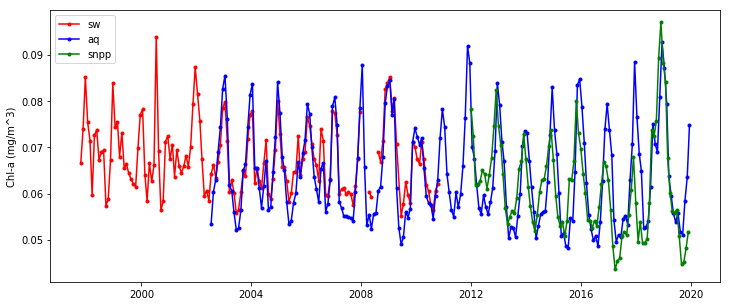

In [21]:
plt.figure(figsize=(12,5)) 
plt.plot(swdates,swAVG,label='sw',c='red',marker='.',linestyle='-')
plt.plot(aqdates,aqAVG,label='aq',c='blue',marker='.',linestyle='-')
plt.plot(snppdates,snppAVG,label='snpp',c='green',marker='.',linestyle='-')
plt.ylabel('Chl-a (mg/m^3)')
plt.legend()

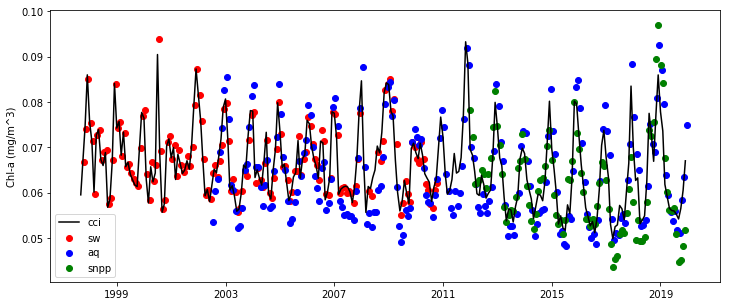

In [22]:
plt.figure(figsize=(12,5)) 
plt.plot(ccidates,cciAVG, label='cci',c='black')
plt.scatter(swdates,swAVG,label='sw',c='red')
plt.scatter(aqdates,aqAVG,label='aq',c='blue')
plt.scatter(snppdates,snppAVG,label='snpp',c='green')
plt.ylabel('Chl-a (mg/m^3)')
plt.legend()
